## Example: Accessibility analysis for single scenario

First import required packages, which are model-system data explorer and matplotilib for plotting.

In [1]:
# Other packages
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Data explorer
MODEL_SYSTEM_PATH = "../scripts/"
sys.path.append(MODEL_SYSTEM_PATH)
from data_explorer.scenario_data import ScenarioData

Then we'll prepare scenario data for scenario. 

In [2]:
scenario1 = ScenarioData(
    scenario_name = "2030_test", 
    submodel = "uusimaa",
    result_data_path = "../Scripts/tests/test_data/Results/test/", 
    base_data_path = "../Scripts/tests/test_data/Base_input_data/2018_zonedata/", 
    spatial_data_path = "../Scripts/tests/test_data/Base_input_data/Geodata/"
)

Cut analysis to subregion of Finland.

In [3]:
scenario1.set_subregion("municipality", ["Helsinki", "Espoo"])

### Accessibility analysis

c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(6637031.47703984, 6916626.6188847395)

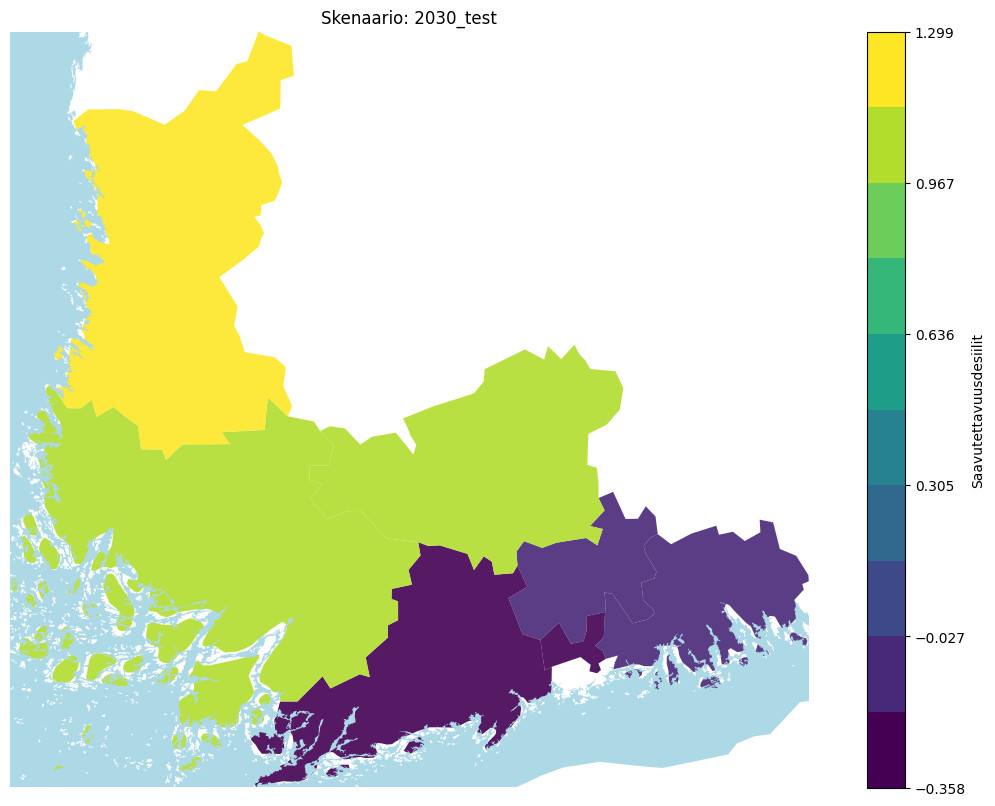

In [4]:
# Get accessibility data to geodataframe
data0 = scenario1.get_result_data("accessibility.txt", geometry=True)
data1 = scenario1.get_input_data("2030.pop")
data = data0.merge(data1, on = "zone_id")
data["underage"] = data["population"] * data["sh_7-17"]

# Columns to use
column_name = "hb_edu_basic_all"
weight_col = "underage"

# Matplot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use("default")

# Discrete colour scale
discrete_cmap = plt.cm.get_cmap("viridis")

# Set bins of 10 quantiles
_, bin_edges = np.histogram(data[column_name], bins = 10, weights=data[weight_col])
norm = mpl.colors.BoundaryNorm(bin_edges, discrete_cmap.N)  


# Visualize travel times into continuous coloring scheme
data.plot(ax=ax, column=column_name, linewidth=0.03, 
          cmap=discrete_cmap, norm=norm,
          alpha=0.9, legend=True, 
          legend_kwds={"label": "Saavutettavuusdesiilit", "orientation": "vertical"})

# Add links to plot
scenario1.get_basemap_layer("water").plot(ax=ax, facecolor="#add8e6")

# Themes
ax.set_axis_off()
plt.tight_layout()
plt.title(f"Skenaario: {scenario1.name}")

# Set axis bb
xmin, ymin, xmax, ymax = data.total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)